# Dataset [walmart](https://www.kaggle.com/competitions/walmart-recruiting-store-sales-forecasting/data)

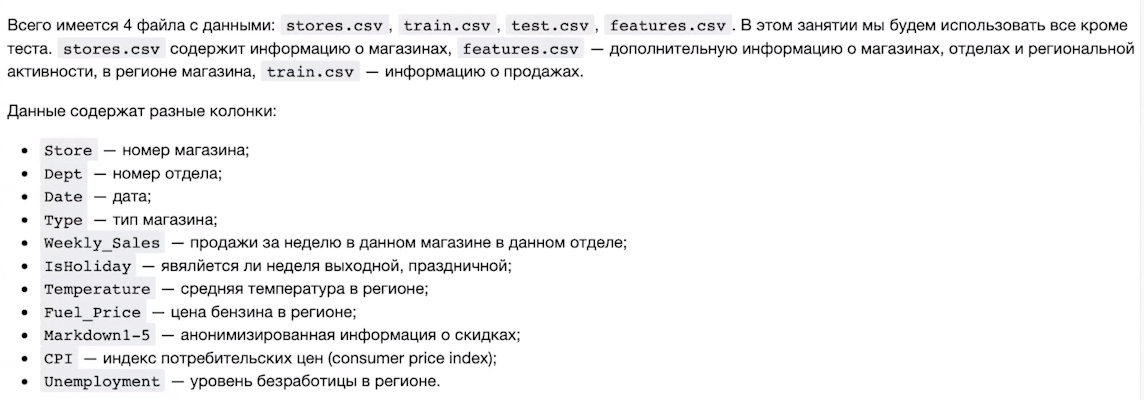

In [ ]:
import pandas as pd

In [ ]:
sales = pd.read_csv("train.csv")
# sales.head()

sales.Date = pd.to_datetime(sales.Date)    
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [ ]:
# распарсить при чтении
# sales = pd.read_csv("train.csv", parse_dates=["Date"])
# sales.info()

In [ ]:
sales.Date[0]

Timestamp('2010-02-05 00:00:00')

In [ ]:
# Перевод формата времени
# strftime переводит дату в строку

sales.to_csv("sales.csv", date_format="%d.%m.%Y", index=None)

# Посмотрим что получилось в файле
with open("sales.csv", "r") as file:
    n = 0
    for line in file.readlines():
        if n == 5:
            break
        print(line)
        n += 1

Store,Dept,Date,Weekly_Sales,IsHoliday

1,1,05.02.2010,24924.5,False

1,1,12.02.2010,46039.49,True

1,1,19.02.2010,41595.55,False

1,1,26.02.2010,19403.54,False



In [ ]:
# Видим что даты записались в нужном формате

# Теперь попробуем прочитать их, укажем нужную колонку для парсинга дат
# sales = pd.read_csv("sales.csv", parse_dates=["Date"])
# sales.head()
# Даты расставились НЕправильно. 
# Pandas предупреждает, что могут быть проблемы с форматом (путаются месяц и день)

# Нужно явно указать день, месяц
# sales = pd.read_csv("sales.csv", parse_dates=["Date"], dayfirst=True)
# sales.head()

# В более сложных случаях можно написать свою функцию распознования date_parser
from datetime import datetime

sales = pd.read_csv("sales.csv", 
                    parse_dates=["Date"], 
                    date_parser=lambda s: datetime.strptime(s, "%d.%m.%Y"))
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
features = pd.read_csv("features.csv", parse_dates=["Date"])
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
date = features.Date[0]
print(date)

print(f"Дата: {date.date()}\n",
      f"День: {date.day}\n",
      f"Месяц: {date.month} ({date.month_name()})\n",
      f"Год: {date.year}\n",
      sep=""
)

2010-02-05 00:00:00
Дата: 2010-02-05
День: 5
Месяц: 2 (February)
Год: 2010



In [ ]:
# День недели, день в году, неделя в году
print(f"День недели: {date.day_of_week} ({date.day_name()})\n",
      f"День года: {date.day_of_year}\n",
      f"Неделя в году: {date.weekofyear}\n",
      sep=""
)

День недели: 4 (Friday)
День года: 36
Неделя в году: 5



In [ ]:
print(f"Часы: {date.hour}\n",
      f"Минуты: {date.minute}\n",
      f"Секунды: {date.second}\n",
      sep=""
)

# Можем добавить свое время, используя класс Timedelta

date += pd.Timedelta("15hour 3min 20sec")
print(date)

Часы: 0
Минуты: 0
Секунды: 0

2010-02-05 15:03:20


### Предположим, нас попросили узнать среднюю цену на бензин за 4 недели по всем магазинам.

**Воспользуемся функцией `resample`.**

* Установим дату как индекс
* Выберем колонку Fuel_Price
* С помощью `resample` объединим даты по 4 недели
* Посчитаем среднее
* `{n}w-FRI` - неделя начинатеся с пятницы

In [ ]:
fuel_prices = (
    features.set_index("Date").
    Fuel_Price.resample("4w-FRI", origin="start").
    mean())

fuel_prices.head()

Date
2010-02-05    2.717844
2010-03-05    2.695306
2010-04-02    2.810739
2010-04-30    2.878839
2010-05-28    2.917350
Freq: 4W-FRI, Name: Fuel_Price, dtype: float64

<Axes: title={'center': 'Цены на бензин'}, xlabel='Date'>

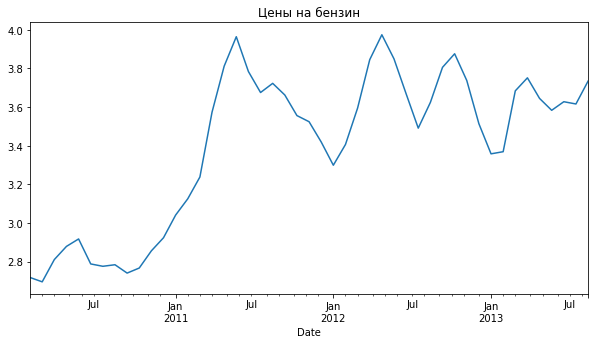

In [ ]:
fuel_prices.plot(title="Цены на бензин", 
                 figsize=(10, 5)
                )

### Процентное изменение цены во времени

* Получить данные со сдвигом по времени
* Посчитать разницу между текущими и даныыми в  будующем
* Эту разницу поделить на предыдущее значение 
* Перевести результат в проценты

In [ ]:
fuel_prices.head()

Date
2010-02-05    2.717844
2010-03-05    2.695306
2010-04-02    2.810739
2010-04-30    2.878839
2010-05-28    2.917350
Freq: 4W-FRI, Name: Fuel_Price, dtype: float64

In [ ]:
shifted_fuel_prices = fuel_prices.shift(periods=1)
shifted_fuel_prices.head()

Date
2010-02-05         NaN
2010-03-05    2.717844
2010-04-02    2.695306
2010-04-30    2.810739
2010-05-28    2.878839
Freq: 4W-FRI, Name: Fuel_Price, dtype: float64

In [ ]:
# на сколько процентов изменилось отн предыдущего времени
pct_change_1 = (fuel_prices - shifted_fuel_prices) / shifted_fuel_prices * 100 
pct_change_1.head()

Date
2010-02-05         NaN
2010-03-05   -0.829293
2010-04-02    4.282755
2010-04-30    2.422850
2010-05-28    1.337731
Freq: 4W-FRI, Name: Fuel_Price, dtype: float64

In [ ]:
# Вместо shift можно использовать diff
# получим тоже самое
pct_change_2 = fuel_prices.diff() / shifted_fuel_prices * 100 
pct_change_2.head()

Date
2010-02-05         NaN
2010-03-05   -0.829293
2010-04-02    4.282755
2010-04-30    2.422850
2010-05-28    1.337731
Freq: 4W-FRI, Name: Fuel_Price, dtype: float64

In [ ]:
# А можно использовать pct_change
pct_change_3 = fuel_prices.pct_change() * 100
pct_change_3.head()

Date
2010-02-05         NaN
2010-03-05   -0.829293
2010-04-02    4.282755
2010-04-30    2.422850
2010-05-28    1.337731
Freq: 4W-FRI, Name: Fuel_Price, dtype: float64

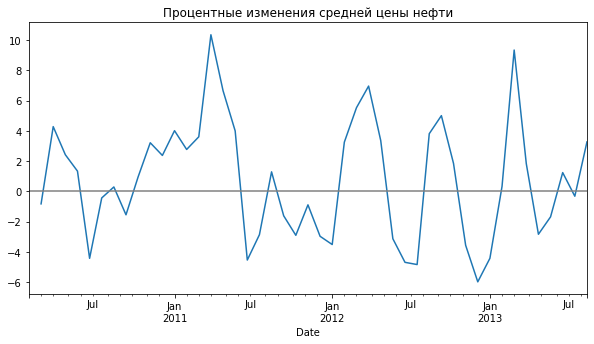

In [ ]:
import matplotlib.pyplot as plt  

pct_change_3.plot(title="Процентные изменения средней цены нефти", 
                 figsize=(10, 5)
)
plt.axhline(c="gray")

### Посмотрим на праздники

In [ ]:
# features[["Date", "IsHoliday"]]

In [ ]:
import numpy as np

# Удалим все повторяющиеся данные
# Удостоверимся, что нет недель, которые одновременно праздничные и нет
holidays = features[["Date", "IsHoliday"]].drop_duplicates()

np.unique(holidays["Date"], return_counts=True)[1]
# увидели что каждая дата представлена ровно 1 раз

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [ ]:
holidays.head()

,Date,IsHoliday
0,2010-02-05,False
1,2010-02-12,True
2,2010-02-19,False
3,2010-02-26,False
4,2010-03-05,False


In [ ]:
# Буем работать с данными как с Series. В качестве индекса установим дату.
holidays = holidays.set_index("Date").squeeze()

In [ ]:
holidays.head()

Date
2010-02-05    False
2010-02-12     True
2010-02-19    False
2010-02-26    False
2010-03-05    False
Name: IsHoliday, dtype: bool

In [ ]:
# Вычислим даты для каждой недели вплоть до конца года, когда будут записываться данные.
# Воспользуемся date_range

future_dates = pd.date_range(
    start=holidays.index[-1],
    end=pd.to_datetime("31.12.2013", dayfirst=True)
)[1:]

future_dates

DatetimeIndex(['2013-07-27', '2013-07-28', '2013-07-29', '2013-07-30',
               '2013-07-31', '2013-08-01', '2013-08-02', '2013-08-03',
               '2013-08-04', '2013-08-05',
               ...
               '2013-12-22', '2013-12-23', '2013-12-24', '2013-12-25',
               '2013-12-26', '2013-12-27', '2013-12-28', '2013-12-29',
               '2013-12-30', '2013-12-31'],
              dtype='datetime64[ns]', length=158, freq='D')

In [ ]:
# holidays

In [ ]:
# future_dates - pd.Timedelta("364D")

In [ ]:
# holidays.loc[future_dates - pd.Timedelta("364D")]

In [ ]:
# Создадим Series с новыми датами
# В качестве значений мы возьмем те же значения, что были год назад.
# Для того чтобы вычислить нужные даты предыдущего года, от новых отнимем 364.
# Потому что 364 делится на 7
# Чтобы обозначить эти дни, будем использовать класс Timedelta

# future_holidays = pd.Series(
#     data=holidays.loc[future_dates - pd.Timedelta("364D")].values,
#     index=future_dates,
# )
# future_holidays

### concat and append

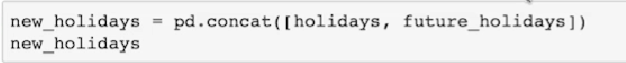

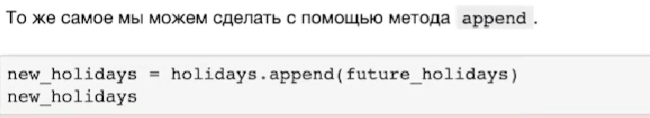

# Декомпозиция временных рядов:

* Тренд - плавное долгосрочное изменение временного ряда
* Сезонность - циклические изменения времнного ряда с постоянным периоом сезонности s
* Ошибка - непрогнозируемая случайная компонента ряда

Виды декомпозиции:
1. Аддитивная
2. Мультипликативная

### Применим методы декомпозиции временных рядов к суммарным данным о продажах

In [ ]:
sales = pd.read_csv("train.csv", parse_dates=["Date"])
sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [ ]:
sales.groupby("Date").sum()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,65124,130557,49750740.50,0
2010-02-12,65082,131179,48336677.63,2956
2010-02-19,65610,131897,48276993.78,0
2010-02-26,65045,130161,43968571.13,0
2010-03-05,64897,129670,46871470.30,0
...,...,...,...,...
2012-09-28,65866,130785,43734899.40,0
2012-10-05,66296,132468,47566639.31,0
2012-10-12,66453,133371,46128514.25,0


In [ ]:
sales_data = sales.groupby("Date").sum()["Weekly_Sales"]
sales_data

Date
2010-02-05    49750740.50
2010-02-12    48336677.63
2010-02-19    48276993.78
2010-02-26    43968571.13
2010-03-05    46871470.30
                 ...     
2012-09-28    43734899.40
2012-10-05    47566639.31
2012-10-12    46128514.25
2012-10-19    45122410.57
2012-10-26    45544116.29
Name: Weekly_Sales, Length: 143, dtype: float64

### Декомпозиция на основе скользящего среднего

Пусть s - известный заранее период сезонности.

* Тренд в момент времени t: $$T_t = \frac{1}{s} \sum^{t + s/2}_{t-s/2} Y_i$$

* Сезонность - усреднение наблюдений для каждого сезона после удаления тренда:
    1. $y_t'= y_t - T$
    2. Формируется s подгрупп $G_i = \{Y_i, Y_{i+s}, ..., Y_{i+ks}\}$
    3. $S_i = \bar{G_i}$
    
* Ошибка: $$R_t = y_t - T_t - S_{t \% s}$$

In [ ]:
# sales_data

In [ ]:
# sales_data

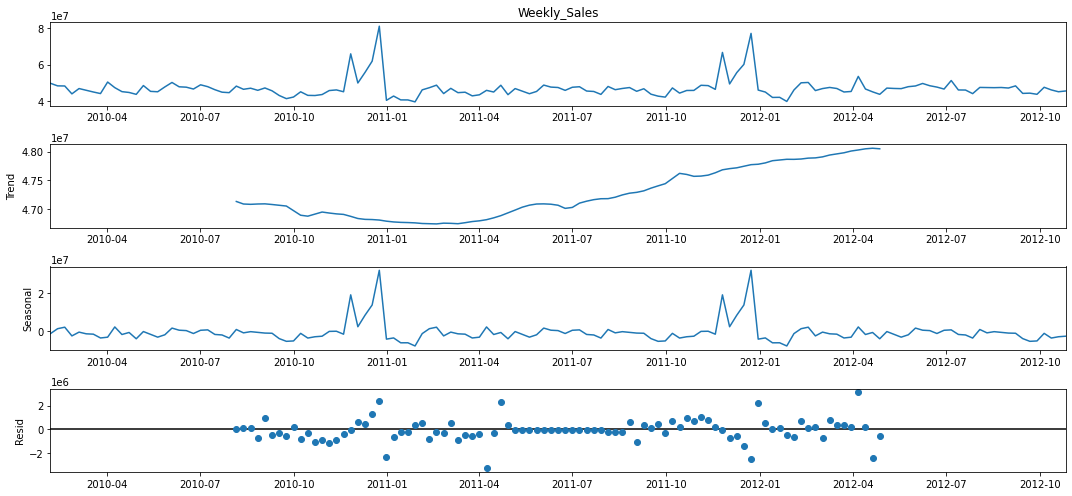

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

from statsmodels.tsa.seasonal import seasonal_decompose


mpl.rcParams["figure.figsize"] = 15, 7

simple_result = seasonal_decompose(sales_data, 
                                   model="additive", 
                                   period=52)
simple_result.plot();

# STL декомпозиция

STL - Seasonal_Trend decomposition using LOESS (locally estimated scatterplot smoohing).

LOESS - взвешенная линейная регрессия, где вес - это расстояние от текущего времени $t$ до 
времени $t'$, на которых 

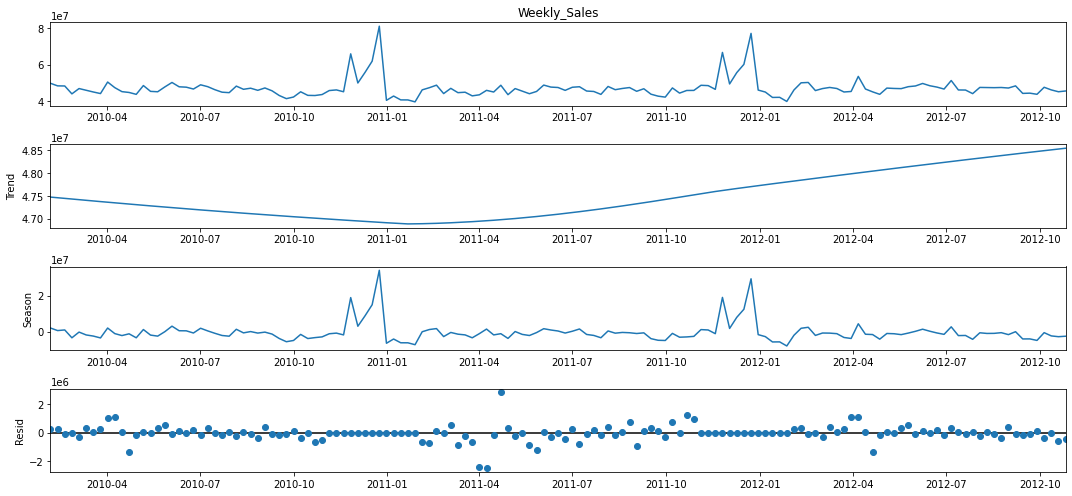

In [ ]:
from statsmodels.tsa.seasonal import STL

result = STL(sales_data, period=52).fit()
result.plot();